In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from collections import Counter

In [2]:
pd.set_option('display.max_columns', None)
dfInit = pd.read_csv('../docs/stroke_data.csv', delimiter=',', encoding='utf8')
df = dfInit.copy(deep=True)
dfCopy = df.copy(deep=True)
sesSet = set(df["SES"])
display(df)

,Age,Gender,SES,Hypertension,Heart_Disease,BMI,Avg_Glucose,Diabetes,Smoking_Status,Stroke
0,66.788137,Male,Medium,1,0,25.842521,96.428681,1,Current,1
1,86.393609,Female,Medium,1,1,32.531061,133.350068,0,Never,1
2,76.158579,Female,Medium,1,0,40.681244,111.489589,0,Never,0
3,72.477870,Female,Low,0,1,33.003193,125.692465,0,Former,0
4,59.881635,Male,Low,0,0,26.062443,123.218486,1,Never,1
...,...,...,...,...,...,...,...,...,...,...
9995,80.647182,Female,Medium,1,1,28.283629,128.639802,0,Former,1
9996,82.607321,Female,Medium,1,1,31.148301,105.025226,1,Current,1
9997,86.020702,Female,High,1,1,32.641037,147.174095,0,Never,1
9998,67.387542,Female,Medium,0,1,29.946547,112.480515,0,Former,0


In [3]:
genderDict = { "Male" : 0, "Female" : 1 }
sesDict = {"Low" : 0, "Medium" : 0.5, "High" : 1 }
smokingStatusDict = { "Never" : 0, "Former" : 0.5, "Current" : 1}
df["Gender"] = df["Gender"].map(lambda elem : genderDict[elem])
df["SES"] = df["SES"].map(lambda elem : sesDict[elem])
df["Smoking_Status"] = df["Smoking_Status"].map(lambda elem : smokingStatusDict[elem])
display(df)

,Age,Gender,SES,Hypertension,Heart_Disease,BMI,Avg_Glucose,Diabetes,Smoking_Status,Stroke
0,66.788137,0,0.5,1,0,25.842521,96.428681,1,1.0,1
1,86.393609,1,0.5,1,1,32.531061,133.350068,0,0.0,1
2,76.158579,1,0.5,1,0,40.681244,111.489589,0,0.0,0
3,72.477870,1,0.0,0,1,33.003193,125.692465,0,0.5,0
4,59.881635,0,0.0,0,0,26.062443,123.218486,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...
9995,80.647182,1,0.5,1,1,28.283629,128.639802,0,0.5,1
9996,82.607321,1,0.5,1,1,31.148301,105.025226,1,1.0,1
9997,86.020702,1,1.0,1,1,32.641037,147.174095,0,0.0,1
9998,67.387542,1,0.5,0,1,29.946547,112.480515,0,0.5,0


In [4]:
df = pd.DataFrame(data=StandardScaler().fit_transform(df), columns=df.columns)
display(df)

,Age,Gender,SES,Hypertension,Heart_Disease,BMI,Avg_Glucose,Diabetes,Smoking_Status,Stroke
0,-0.300914,-1.007428,0.121825,0.806666,-0.659021,-0.448817,-0.772655,2.025350,1.722643,1.535565
1,1.685663,0.992627,0.121825,0.806666,1.517402,0.915863,1.475863,-0.493742,-0.757943,1.535565
2,0.648571,0.992627,0.121825,0.806666,-0.659021,2.578766,0.144557,-0.493742,-0.757943,-0.651226
3,0.275614,0.992627,-1.318190,-1.239671,1.517402,1.012194,1.009514,-0.493742,0.482350,-0.651226
4,-1.000733,-1.007428,-1.318190,-1.239671,-0.659021,-0.403946,0.858848,2.025350,-0.757943,1.535565
...,...,...,...,...,...,...,...,...,...,...
9995,1.103391,0.992627,0.121825,0.806666,1.517402,0.049249,1.189007,-0.493742,0.482350,1.535565
9996,1.302007,0.992627,0.121825,0.806666,1.517402,0.633735,-0.249124,2.025350,1.722643,1.535565
9997,1.647877,0.992627,1.561841,0.806666,1.517402,0.938302,2.317749,-0.493742,-0.757943,1.535565
9998,-0.240177,0.992627,0.121825,-1.239671,1.517402,0.388538,0.204904,-0.493742,0.482350,-0.651226


5

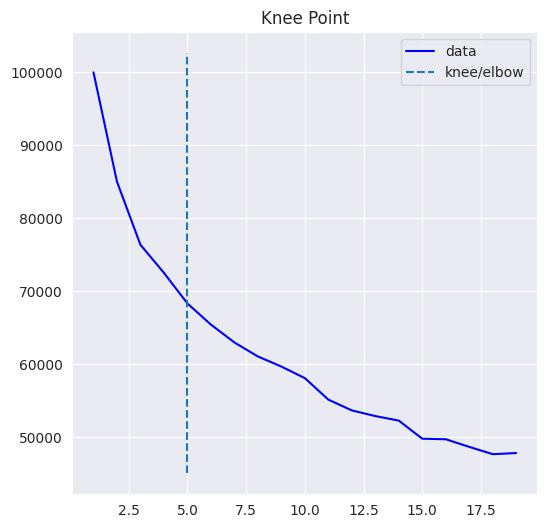

In [5]:
distortions = []
K = range(1, 20)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)

kneedle = KneeLocator(K, distortions, curve="convex", direction="decreasing")
n_clusters = kneedle.knee
display(n_clusters)
kneedle.plot_knee()

In [6]:
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit_predict(df)

Counter(kmeans)

Counter({1: 3718, 0: 2829, 3: 1738, 2: 1715})

0.7218413705960756

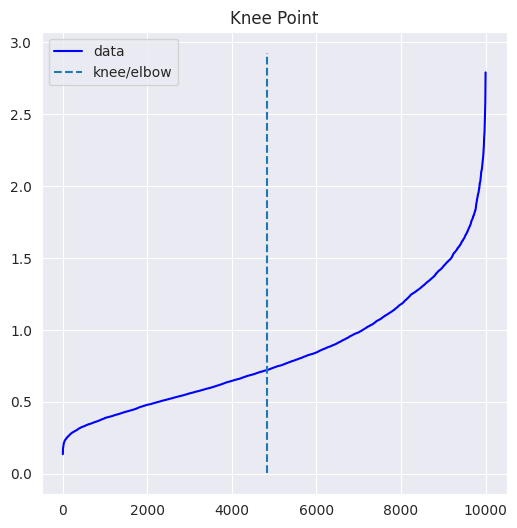

In [7]:
neighbors = NearestNeighbors(n_neighbors=5).fit(df)
neighborsDist, neighborsIndex = neighbors.kneighbors(df)
sortNeighborsDist = np.sort(neighborsDist, axis=0)

x = range(1, len(neighborsDist) + 1)
y = sortNeighborsDist[:, 3]

kneeLocator = KneeLocator(x, y, curve="convex", S=35)
knee = kneeLocator.knee_y
display(knee)
kneeLocator.plot_knee()
plt.show()

In [8]:
clusters = DBSCAN(eps=knee, min_samples=20).fit(df)
Counter(clusters.labels_)

Counter({-1: 8767,
         4: 290,
         0: 262,
         2: 240,
         1: 212,
         3: 91,
         8: 48,
         6: 38,
         5: 31,
         7: 21})

<Figure size 3000x2000 with 0 Axes>

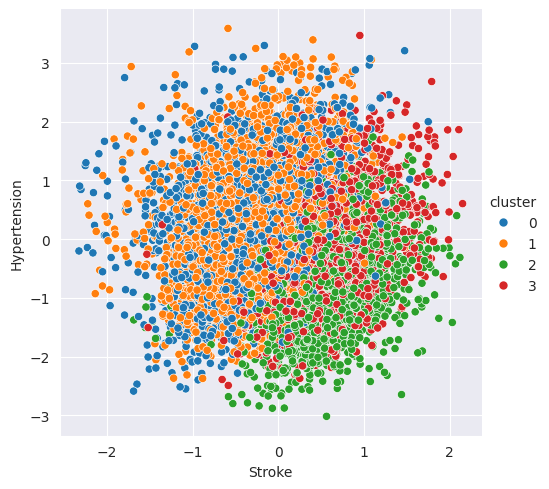

In [16]:
pca = PCA().fit_transform(df)
pca = pd.DataFrame(data=pca, columns=df.columns)

pca["cluster"] = kmeans
pca["cluster"] = pca["cluster"].astype("category")

plt.figure(figsize = (30, 20))
sns.relplot(x="Stroke", y="Hypertension", hue="cluster", data=pca)

<Figure size 3000x2000 with 0 Axes>

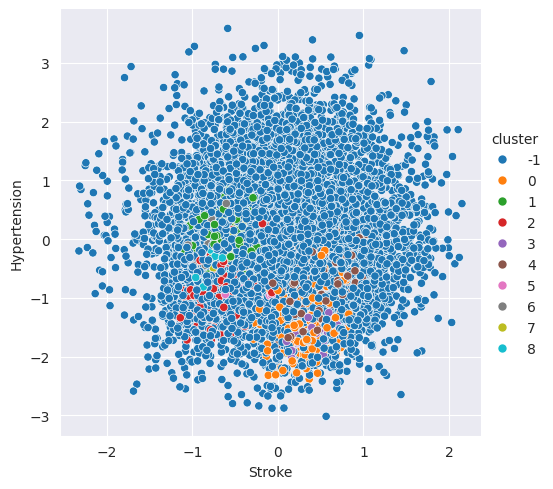

In [17]:
pca["cluster"] = clusters.labels_
pca["cluster"] = pca["cluster"].astype("category")
plt.figure(figsize = (30, 20))

sns.relplot(x="Stroke", y="Hypertension", hue="cluster", data=pca)

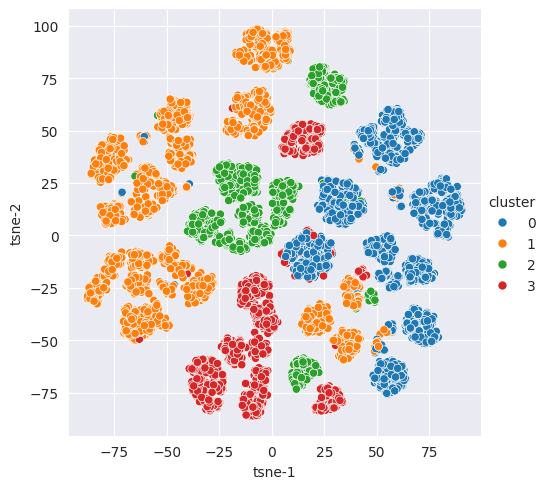

In [18]:
subsetLen = len(df)
subsetDf = df[:subsetLen]

tSNEModel = TSNE().fit_transform(subsetDf)
tSNEDF = pd.DataFrame()

tSNEDF["tsne-1"] = tSNEModel[:, 0]
tSNEDF["tsne-2"] = tSNEModel[:, 1]

tSNEDF["cluster"] = kmeans[: subsetLen]
tSNEDF["cluster"] = tSNEDF["cluster"].astype("category")

sns.relplot(x="tsne-1", y="tsne-2", hue="cluster", data=tSNEDF)


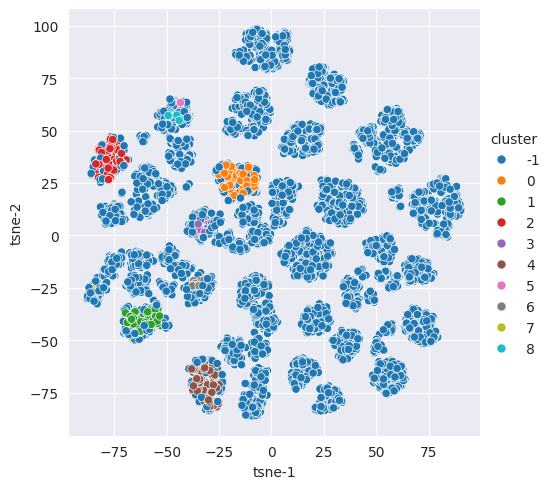

In [19]:
tSNEDF["cluster"] = clusters.labels_
tSNEDF["cluster"] = tSNEDF["cluster"].astype("category")

sns.relplot(x="tsne-1", y="tsne-2", hue="cluster", data=tSNEDF)